In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('C:/Users/ACER/Downloads/smite2_items.csv')

In [5]:
print(df.head())

        Name  Price  Tier  Strength  Attack_Speed_Percentage  Max_Mana  \
0        Axe    450     1      10.0                      0.0       0.0   
1        Bow    350     1       0.0                      5.0       0.0   
2    Circlet    350     1       0.0                      0.0     115.0   
3        Gem    450     1       0.0                      0.0       0.0   
4  Medallion    350     1       0.0                      0.0       0.0   

   Intelligence  Max_Health  Cooldown_Rate_Percentage  Magical_Protection  \
0           0.0         0.0                       0.0                 0.0   
1           0.0         0.0                       0.0                 0.0   
2           0.0         0.0                       0.0                 0.0   
3          15.0         0.0                       0.0                 0.0   
4           0.0        85.0                       0.0                 0.0   

   Critical_Chance_Percentage  Lifesteal_Percentage  Physical_Protection  \
0               

In [6]:
# Daftar kolom kategorikal yang ingin diubah
categorical_columns = ['Name', 'Passive']

In [7]:
# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [8]:
# Iterasi melalui daftar kolom kategorikal dan ubah menjadi numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [9]:
# Menampilkan beberapa baris pertama dari DataFrame untuk verifikasi
df

,Name,Price,Tier,Strength,Attack_Speed_Percentage,Max_Mana,Intelligence,Max_Health,Cooldown_Rate_Percentage,Magical_Protection,Critical_Chance_Percentage,Lifesteal_Percentage,Physical_Protection,Magical_Penetration_Percentage,Physical_Penetration_Percentage,Mana_Regen,Movement_Speed_Percentage,Health_Regen,Passive,Active
0,4,450,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,13,350,1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,19,350,1,0.0,0.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,31,450,1,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,47,350,1,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,84,2600,0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,0
87,85,2950,0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,0
88,86,2750,0,0.0,0.0,175.0,55.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41,0
89,88,2500,0,0.0,0.0,350.0,55.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [10]:
# Cek missing values
print(df.isnull().sum())

Name                               0
Price                              0
Tier                               0
Strength                           0
Attack_Speed_Percentage            0
Max_Mana                           0
Intelligence                       0
Max_Health                         0
Cooldown_Rate_Percentage           0
Magical_Protection                 0
Critical_Chance_Percentage         0
Lifesteal_Percentage               0
Physical_Protection                0
Magical_Penetration_Percentage     0
Physical_Penetration_Percentage    0
Mana_Regen                         0
Movement_Speed_Percentage          0
Health_Regen                       0
Passive                            0
Active                             0
dtype: int64


In [11]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)


In [13]:
# Definisikan fitur dan target
X = df.drop("Active", axis=1)
y = df["Active"]

In [14]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [16]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)

In [18]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7894736842105263


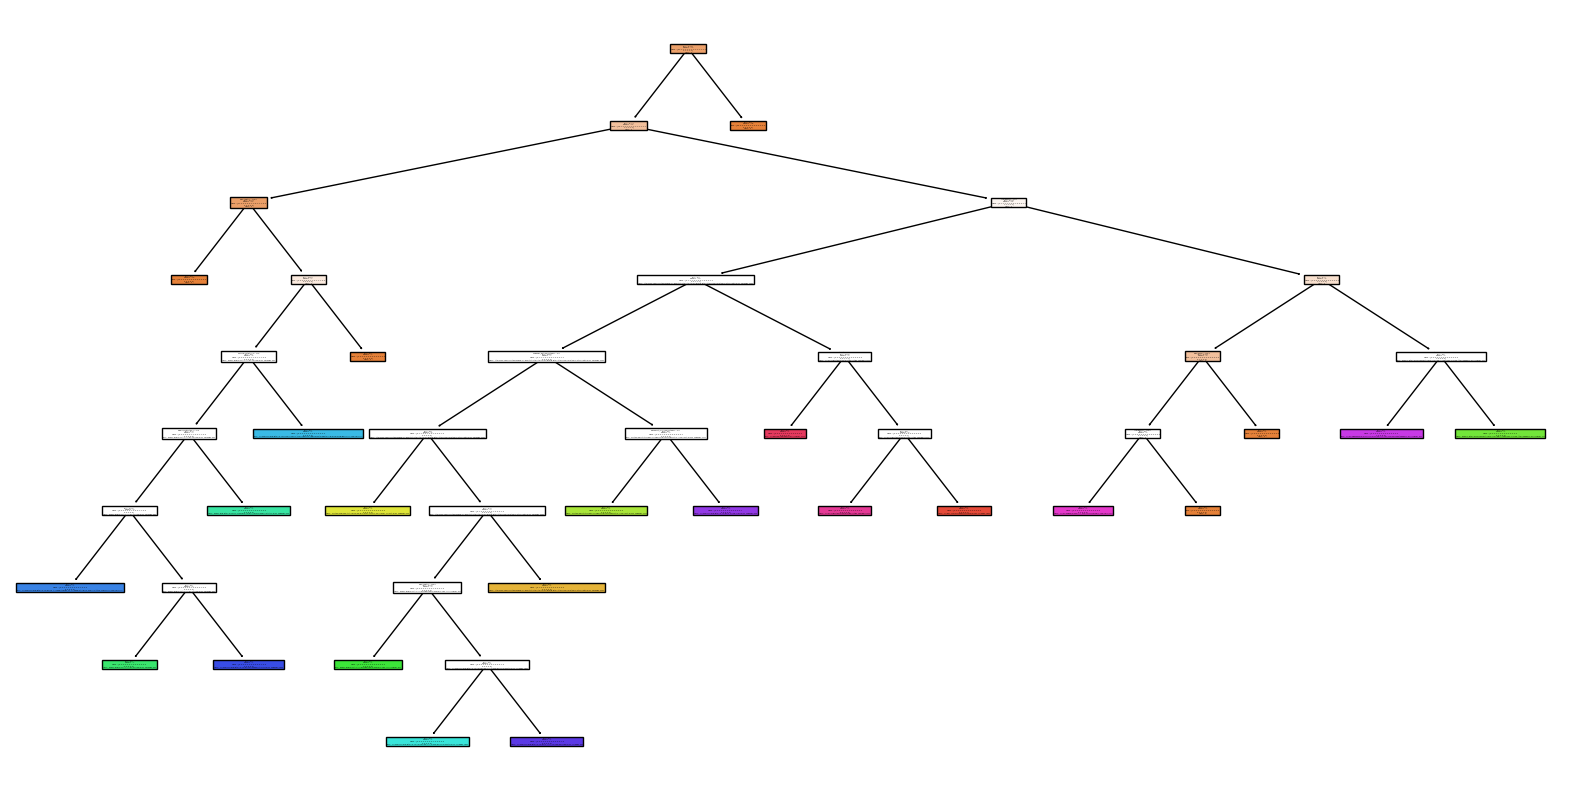

In [19]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()